# **EE-613: Machine Learning for Engineers**
 
**SVM Lab**<br>
Dr. Jean-Marc Odobez and Dr. Michael Villamizar<br>
Idiap Research Institute<br>
2019

Note that the report.doc file is provided as a guide, but does not need to be sent back.

# Part 2: Support Vector Machines

The goal of this lab session is to experiment with Support Vector Machines (SVM) for binary classification, and in particular to understand the role of the hyperparameters.


This notebook consists of five exercises with questions that you can complete and answer. Insert the solution and answers in the student report file (./report.doc). 

In [42]:
# Import libraries.
import sys
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Own libraries.
sys.path.append('../lib/')
import utils as utils
import test_exercises as tests

## 1. Linear SVM - Two-dimensional data

In this section, the goal is to apply a linear SVM to two-dimensional data points.

<font color="blue" size="+1">**Exercise 1: Load and visualize data**</font>

The next cells have the code to load and visualize the 2D dataset. Run the cells and insert the answer to the question below in the <span style="color:red">**student report**</span> file.

**Q1**: Do you think that the classes are linearly separable?

In [43]:
# Parameters.
path = 'data/ex1Data/twofeature.txt'  # Dataset file.

# Load the 2D dataset. This function returns a Nx2 array (X) 
# containing the dataset samples (points) in a 2D feature 
# space (x1, x2), and a N vector (y) containing the class 
# labels {-1, +1} for all samples.
X, y = utils.load_2d_dataset(path)

# Messages.
print ('2D Dataset:')
print ('+ Num. samples: {0}'.format(X.shape[0]))
print ('+ Data format:', X.shape)
print ('+ Labels format:', y.shape)

2D Dataset:
+ Num. samples: 51
+ Data format: (51, 2)
+ Labels format: (51,)


Run the next cell to visualize the 2D dataset containing 2D points belonging to two classes.

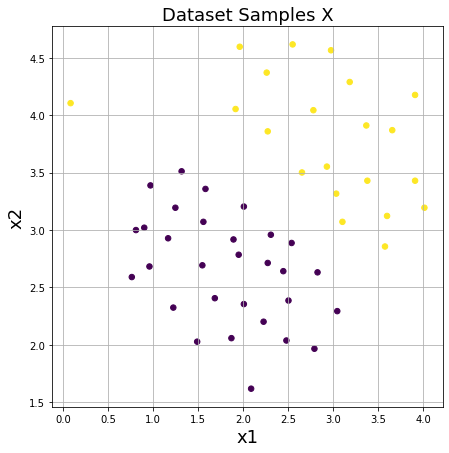

In [44]:
# Show 2D dataset samples.
def show_2d_dataset(X, y, title='Dataset samples'):
    """This function shows the dataset samples. """
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111)
    ax.scatter(X[:,0],X[:,1],c=y, s=30)
    plt.xlabel('x1', fontsize=18)
    plt.ylabel('x2', fontsize=18)
    plt.title(title, fontsize=18)
    plt.grid(True)
    return ax
    
# Show 2D dataset samples (points).
show_2d_dataset(X, y, 'Dataset Samples X');

<font color="blue" size="+1">**Exercise 2: Learn the SVM**</font>

Complete the function in the next cell to learn a linear SVM classifier. Use the scikit-learn function [*SVC*](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) to implement the classifier. In particular, pay attention in using the right kernel.

Insert the implemented code (*TODO* block only) in the <span style="color:red">**student report**</span> file.


In [45]:
# Learn SVM.
def learn_svm(X, y, C=1.0):
    """ This function learns a linear SVM to perform binary 
        classification on the input dataset (X,y). 
        
    Input:
        + X (Numpy ndarray): Nx2 array with the dataset samples
            (2D points), being N the number of samples.
        + y (Numpy ndarray): N vector with the class labels {-1,+1}.
        + C (float): Cost parameter (Default: C=1.0).
    Output:
        + svm (class): Trained linear SVM classifier.
    """

    #====================================================
    # TODO: Complete the next lines to create and train 
    # the SVM classifier using a linear kernel.
    svm = SVC(gamma='auto', C=C, kernel='linear')
    svm.fit(X,y)
    #====================================================
           
    return svm

#### **Test your exercise**
Run the next cell to test your exercise
    


In [46]:
# Check implementation.
tests.test_linear_svm(learn_svm)

Checking implementation
>> Running test 1 ...  ok
>> Running test 2 ...  ok
The exercise is correct. Well done !!!


The following function computes the class predictions using the trained SVM classifier.

In [47]:
# Class predictions.
def prediction(svm, X):
    """ This function computes the class predictions using 
        the trained SVM on the input samples (X). 
        
    Input:
        + X (Numpy ndarray): Nx2 array with the dataset samples
            (2D points), being N the number of samples.
        + svm (class): Trained linear SVM classifier.
    Output:
        + yp (Numpy ndarray): N vector with the class predictions
            {+1, -1} given by the SVM classifier.
    """
    
    # Class predictions.
    yp = svm.predict(X)
    
    return yp

The function in the next cell computes the classification accuracy between the true class labels ($y$) and the predicted class labels given by the classifier ($yp$).

In [48]:
# Classification accuracy.
def accuracy(y, yp):
    acc = np.sum(y==yp)/len(y)
    return acc

Run the next cell to learn the linear SVM classifier and to obtain its class predictions and its classification accuracy on $X$.

In [49]:
# Learn linear SVM.
svm = learn_svm(X, y, C=100)

# Class predictions for dataset samples (X).
yp = prediction(svm, X)

# Classification accuracy.
acc = accuracy(y, yp)

# Message.
print('Classification accuracy: {0:.3f}'.format(acc))

Classification accuracy: 1.000


<font color="blue" size="+1">**Exercise 3: Plotting the decision boundary**</font>

Recall that when using a linear SVM, the decision boundary is a line, the parameters of which can be derived from the optimized SVM model.

In the next cell the important information from the learned model is extracted: support vectors, their class, their weights after the SVM optimization step (note that with scikitlearn, the weights are already multiplied by the support vector labels, the weight $w_i$ of a support vector is already equal to $a_i y_i$ (or $a_i t_i$ using the course notations)), the coefficients of regression in the 2D feature space, and the bias. We use the two later terms to display the linear decision function in the feature space. We also display the support vectors (shown in red). For further information on SVM, go to [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).


Answer the following questions:

**Q1:** First remind the expression providing the weights and bias of the boundary decision line in function of the support vector, their class, and the weights learned during the SVM optimization.

**Q2:** Then compute the weights using this expression, and verify that they are the same than the coefficients provided by the SVM class (svm.coef_).

Insert the expression and the implemented code (*TODO* block only) in the <span style="color:red">**student report**</span> file.


Regression coefficient
[[ 4.68150544 13.08944402]]
(3, 1)
Regression coefficient computed from formula: 
[[ 4.68150544 13.08944402]]


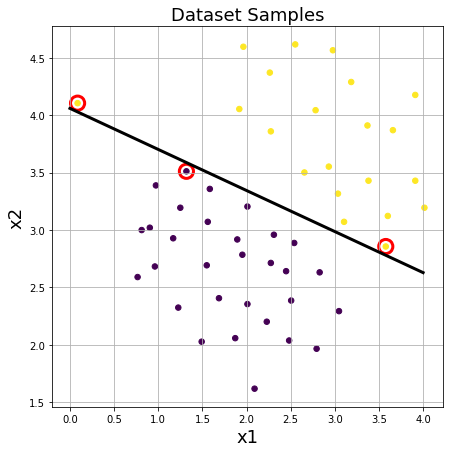

In [51]:
# Show the decision boundary of a learned SVM.
def decision_boundary(svm, ax):
    
    # SVM attributes.
    s = svm.support_vectors_  # Support vectors.
    w = svm.dual_coef_[0,:]   # The weights associated with the support vectors 
                              # (note that the weights already include the multiplication by the labels)
    wf = svm.coef_            # Coefficients of linear regression in the feature space (case of linear SVM)
    b = svm.intercept_        # Bias.
    
    # Display the linear regression coefficient.
    print("Regression coefficient")
    print(wf)
    
    #=============================================================
    # TODO: Compute and display the linear regression coefficient 
    # using the course formula (linear computation of the support 
    # vectors (s) and the SVM weights (w -which are already 
    # multiplied by the class label here)).
    # Use the numpy function reshape to reshape w as an array to 
    # do the dot product.
    #wformula=np.zeros(wf.shape)  # Zeros
    wr = np.reshape(w, (np.size(w),1))
    print(wr.shape)
    wformula = np.dot(wr.T,s)
    #=============================================================
    
    print("Regression coefficient computed from formula: ")
    print(wformula)
        
    # Plot the linear model, given by 
    # wf * xf + b = 0 (where xf=(x,y)
    # in other words,  : wf[0,0]  x  + wf[0,1]  y + b = 0 
    #  or y = - wf[0,0]/wf[0,1]    x  - b/wf[0,1]
    a = -wf[0,0] / wf[0,1]
    xx = np.linspace(0, 4)
    yy = a * xx - (b) / wf[0,1]
    ax.plot(xx, yy, 'k', lw=3);    

    # Plot support vectors.
    ax.scatter(s[:, 0], s[:, 1], s=200, lw=3, \
               facecolors='none', edgecolors='r');
    
# Show dataset samples.
ax = show_2d_dataset(X, y, 'Dataset Samples')

# Shown linear model.
decision_boundary(svm, ax)    

<font color="blue" size="+1">**Exercise 4: Parameter $C$**</font>

Run the next cell to learn the linear SVM classifier on the 2D dataset samples ($X$). In particular, experiment with different values of the cost parameter $C$ (eg. $C=1,100$, or more). 

**Q1**: Do you observe any difference in the learned hyperplane for different values of $C$? In the evolution of the support vectors? Comment on your observations.<br>

Insert in the <span style="color:red">**student report**</span> file the resulting figure for $C=1$ and $C=100$, and the answer to the questions.

Classification accuracy: 1.000
Regression coefficient
[[ 4.68150544 13.08944402]]
Regression coefficient computed from formula: 
[[0. 0.]]


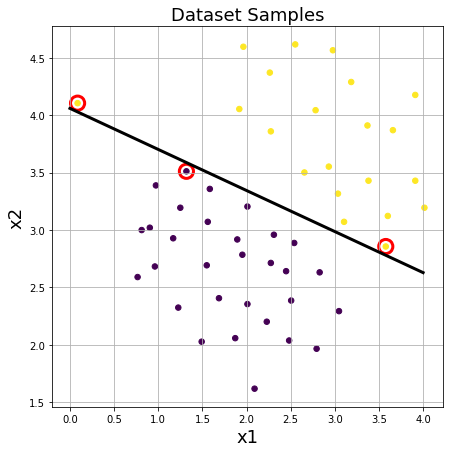

In [16]:
# Parameters.
C = 100  # Cost parameter.

# Learn linear SVM.
svm = learn_svm(X, y, C=C)

# Class predictions for dataset samples (X).
yp = prediction(svm, X)

# Classification accuracy.
acc = accuracy(y, yp)

# Message.
print('Classification accuracy: {0:.3f}'.format(acc))

# Show dataset samples.
ax = show_2d_dataset(X, y, 'Dataset Samples')

# Shown linear model.
decision_boundary(svm, ax)    

## 2. Linear SVM - Email classification as spam/nonspam

In this section, the goal is to apply a linear SVM to classify emails as spam/nonspam.


The data is organized in arrays, where each row represents one document (an email), and each of the 2500 columns represents one particular word in a dictionary. For a particular row (document), the value at column $j$ is the number of times that the $j^{th}$ word of the dictionary has occurred in the document. When loading, the data is separated in two subsets: the training set and the test set.

Run the next cell to load the emails dataset having 50 training documents (emails).


In [17]:
# Parameters.
num_train_docs = 50  # Number of training samples (emails).

# Load the emails dataset. It returns the train and test subsets.
# They follow the same format used in the 2D points dataset.
train_X, train_y, test_X, test_y = utils.load_emails(num_train_docs)

# Messages.
print('Emails Dataset:')
print('+ Num. train emails: {}'.format(train_X.shape[0]))
print('+ Num. test emails: {}'.format(test_X.shape[0]))
print('+ Train data format:', train_X.shape)
print('+ Test data format:', test_X.shape)
print('+ Train labels format:', train_y.shape)
print('+ Test labels format:', test_y.shape)

Emails Dataset:
+ Num. train emails: 50
+ Num. test emails: 260
+ Train data format: (50, 2500)
+ Test data format: (260, 2500)
+ Train labels format: (50,)
+ Test labels format: (260,)


<font color="blue" size="+1">**Exercise 5: Learn and test SVM models**</font>

Complete the code below to learn a linear SVM classifier on the training set and apply it on the test data. Repeat for different sizes of the training data: 50, 100, 400 and 700 training emails. Visualize the trained weights, and how they evolve as you change the number of training samples (emails). The classification accuracy is also computed on the test data.

**Q1**: What are the classification accuracies for 50, 100, 400 and 700 samples using $C=1$?<br>
**Q2**: Describe how the trained weights and the classification accuracies (train and test) evolve with the number of training samples?<br>
**Q3**: For 100 documents, report the training and classification accuracy for C=1, 10 or 100. How do the learned weights evolve? What can you notice? Explain the results.

Insert the answers to the questions and the implemented code (*TODO* block only) in the <span style="color:red">**student report**</span> file.

Email classification:
+ Num. train samples 50
+ Training classification accuracy: 1.000
+ Testing classification accuracy: 0.754


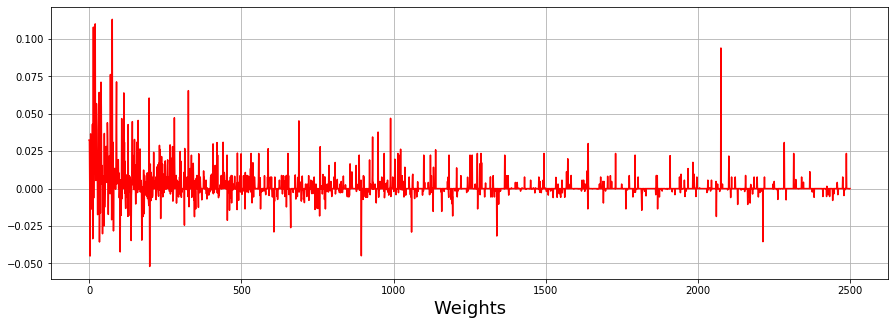

In [18]:
# Parameters.
C = 1  # Cost parameter.
num_train_docs = 50  # Number of training docs (emails).

# Load the emails dataset. It returns the train and test subsets.
train_X, train_y, test_X, test_y = utils.load_emails(num_train_docs)

#================================================
# TODO: Complete the next lines to create and
# train the linear SVM using the training data.
svm = SVC(kernel='linear', C=C, gamma='auto')
svm.fit(train_X, train_y)
#================================================

# Model weights.
w = svm.coef_[0]

#================================================
# TODO: Complete the next line to compute the
# class predictions on the train and test data.
yp_train = svm.predict(train_X)
yp_test = svm.predict(test_X)
#================================================

# Compute the train and test classification accuracy.
acc_train = accuracy(train_y, yp_train)
acc_test = accuracy(test_y, yp_test)

# Message.
print('Email classification:')
print('+ Num. train samples {0}'.format(num_train_docs))
print('+ Training classification accuracy: {0:.3f}'.format(acc_train))
print('+ Testing classification accuracy: {0:.3f}'.format(acc_test))

# Plot the model weights.
plt.figure(figsize=(15,5))
plt.plot(w, 'r-')
plt.xlabel('Weights', fontsize=18)
plt.grid(True)
plt.show()